In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)

df=pd.read_csv('/data/pepper/final_data/arcs_calculated.csv', sep=',',header=0)


height has been deprecated.



In [49]:
df_data = df[(df.eNum == 1) & (df.Side == 'lr')]
max_data= df_data.groupby(['pNum']).max()
max_data

,Unnamed: 0,Side,arc,arc_left,arc_right,eNum,frameNum
pNum,,,,,,,
1,68,lr,NaN,173.238952,159.310108,1,821.0
3,119,lr,NaN,166.491235,172.710128,1,597.0
4,204,lr,NaN,172.003453,177.167536,1,875.0
5,189,lr,NaN,185.082334,171.220155,1,827.0
6,240,lr,NaN,188.361592,179.760833,1,890.0
7,147,lr,NaN,186.893129,179.979512,1,959.0
8,141,lr,NaN,166.579381,171.857095,1,762.0
9,154,lr,NaN,177.076544,184.726170,1,810.0
10,227,lr,NaN,181.141368,187.591309,1,750.0


In [61]:
from sklearn.cluster import KMeans
to_model = max_data[['arc_left','arc_right']]
model = KMeans(n_clusters = 8)
model.fit(to_model)
labels = model.predict(to_model)
print(len(labels))     

89


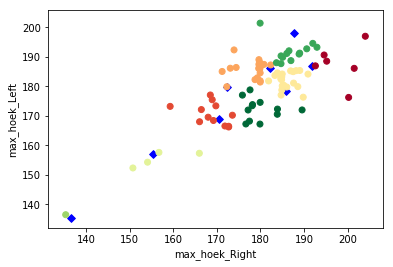

In [64]:
xs = to_model['arc_right']
ys = to_model['arc_left']
plt.xlabel("max_hoek_Right")
plt.ylabel("max_hoek_Left")
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker= 'D', s=30, color='blue')
plt.scatter(xs, ys , alpha=1, c=labels, cmap=plt.cm.RdYlGn)
plt.show()

# Analyse na clusteren

blauwe vierkant = centroids

Met deze cluster kan je niet zo veel halen, het is meer te zien in de maat van symmetrie.
Dat mensen die niet symmetries zijn kan mischien schouder klachten hebben.
